# Understanding Descriptive Statistics

Import the necessary libraries here:

In [101]:
# Libraries

import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [102]:
# your code here

dice_faces = [1, 2, 3, 4, 5, 6]

def simulate_dice_rolling(num_rolls):
    rolls = random.choices(dice_faces, k = num_rolls)
    data = {"Roll": range(1, num_rolls + 1), "Result": rolls}
    df = pd.DataFrame(data)

    return df

In [103]:
dice_rolls_df = simulate_dice_rolling(10)
dice_rolls_df

,Roll,Result
0,1,2
1,2,1
2,3,3
3,4,5
4,5,1
5,6,5
6,7,6
7,8,5
8,9,2
9,10,4


#### 2.- Plot the results sorted by value.

In [104]:
# your code here

sorted_df = dice_rolls_df.sort_values("Result")
print(sorted_df)

   Roll  Result
1     2       1
4     5       1
0     1       2
8     9       2
2     3       3
9    10       4
3     4       5
5     6       5
7     8       5
6     7       6


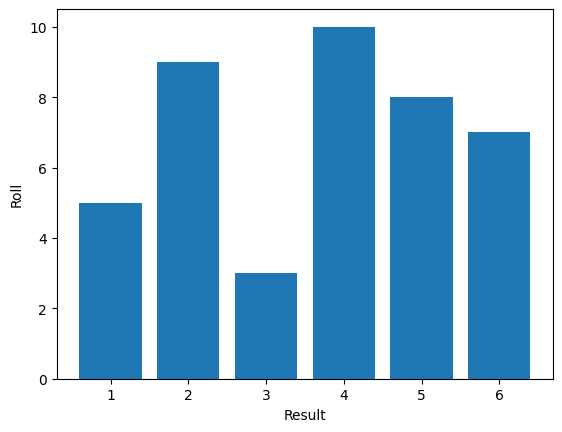

In [105]:
plt.bar(sorted_df["Result"], sorted_df["Roll"])
plt.xlabel("Result")
plt.ylabel("Roll")

plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [106]:
# your code here

freq_distr = dice_rolls_df["Result"].value_counts().sort_index()
print(freq_distr)

Result
1    2
2    2
3    1
4    1
5    3
6    1
Name: count, dtype: int64


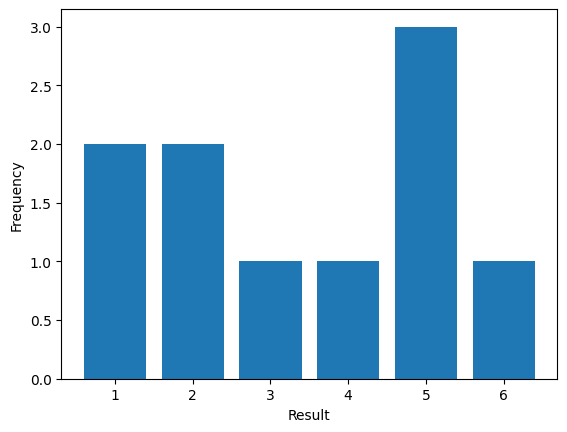

In [107]:
plt.bar(freq_distr.index, freq_distr.values)
plt.xlabel("Result")
plt.ylabel("Frequency")
plt.show()

In [108]:
# Both plots are based on the Result. The first one displaying the roll attempt that showed a certain result. The second displaying the frequency of each result being displayed by roll.

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [109]:
# your code here

def calculate_mean(data):
    total_sum = 0
    n = 0

    for observation in data:
        total_sum += observation
        n += 1

    mean = total_sum / n
    return mean

calculate_mean(dice_rolls_df["Result"])

3.4

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [110]:
# your code here

def calculate_mean_from_freq_distr(freq_distr):
    total_sum = 0
    n = 0

    for value, frequency in freq_distr.items():
        total_sum += value * frequency
        n += frequency

    mean = total_sum / n
    return mean

calculate_mean_from_freq_distr(freq_distr)

3.4

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [111]:
# your code here

def calculate_median(data):
    sorted_data = sorted(data)

    n = len(sorted_data)

    if n%2 == 1:
        median = sorted_data[n // 2]
    else:
        pt1 = sorted_data[n // 2 - 1]
        pt2 = sorted_data[n // 2]
        median = (pt1 + pt2) / 2

    return median

calculate_median(dice_rolls_df["Result"])

3.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [112]:
# your code here

def calculate_quartiles(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
    median = calculate_median(sorted_data)

    index_q1 = n // 4
    index_q3 = (3 * n) // 4

    q1 = sorted_data[index_q1]
    q3 = sorted_data[index_q3]


    return q1, q3, median

calculate_quartiles(dice_rolls_df["Result"])

(2, 5, 3.5)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [113]:
# your code here


data = pd.read_csv('/Users/pedroblanc/Ironhack/Course/WeekFour/Labs/Descriptive-Stats/data/roll_the_dice_hundred.csv')
data.head()

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


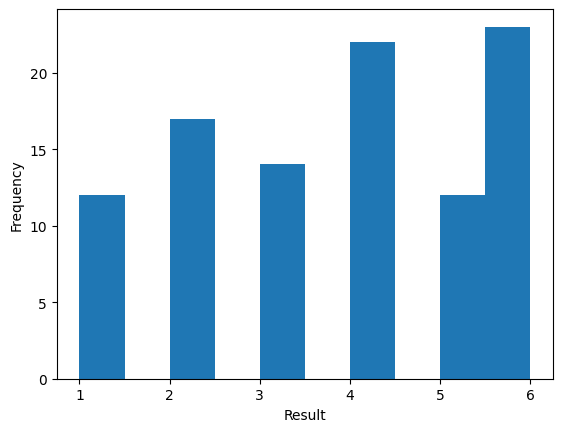

In [139]:
sorted_dice = data.sort_values("value")[["roll", "value"]]

plt.hist(data["value"])

# set labels and title
plt.xlabel("Result")
plt.ylabel("Frequency")

plt.show()

In [115]:
# It appears that rolling an odd number is less frequent. Possibly because of uneven dice.

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [116]:
# your code here

calculate_mean(data["value"])


3.74

#### 3.- Now, calculate the frequency distribution.


In [117]:
# your code here

frequency_distr = data["value"].value_counts().sort_index()
frequency_distr

value
1    12
2    17
3    14
4    22
5    12
6    23
Name: count, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

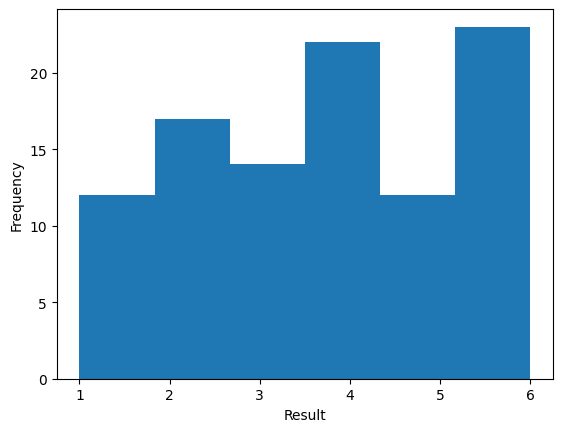

In [138]:
# your code here

plt.hist(data["value"], bins=len(frequency_distr))

plt.xlabel("Result")
plt.ylabel("Frequency")

plt.show()

In [119]:
# This histogram is very similar to the one produced previously. Not sure what I can take away besides the mean being 3.74.

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [144]:
# your code here

thousand_df = pd.read_csv("/Users/pedroblanc/Ironhack/Course/WeekFour/Labs/Descriptive-Stats/data/roll_the_dice_thousand.csv")
thousand_df.head()

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5


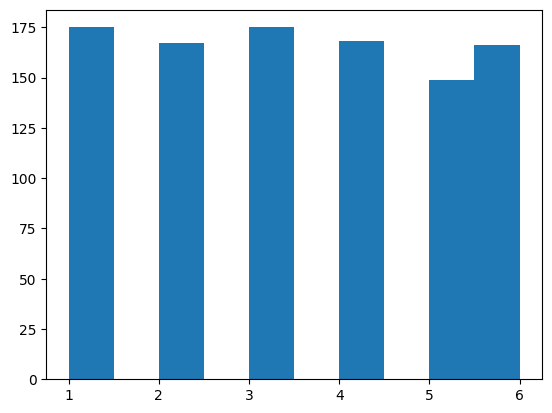

In [145]:
values = sorted(thousand_df["value"])

plt.hist(values)

plt.show()

In [121]:
# A much higher number of rolls will provide more ambiguous results

'\nyour comments here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [146]:
# your code here

ages = pd.read_csv("/Users/pedroblanc/Ironhack/Course/WeekFour/Labs/Descriptive-Stats/data/ages_population.csv")
ages.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


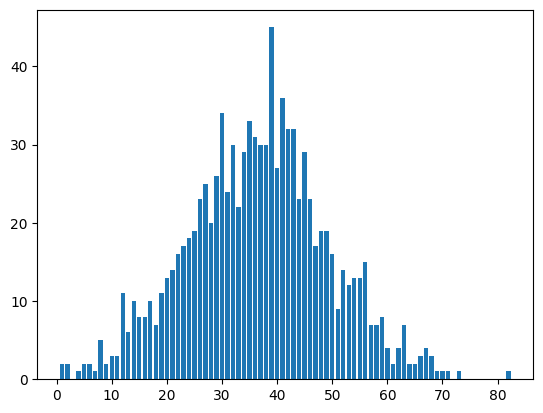

In [148]:
frequency_distr = ages["observation"].value_counts().sort_index()

plt.bar(frequency_distr.index, frequency_distr.values)
plt.show()

In [152]:
# The mean appears to be around 37
# The standard deviation appears to be around 10

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [153]:
# your code here

print("The mean is: ", ages.mean())
print("The standard deviation is: ", ages.std())

The mean is:  observation    36.56
dtype: float64
The standard deviation is:  observation    12.8165
dtype: float64


In [154]:
# The actual values for the mean and standard deviation were close to the ones guessed, with a slight margin of error

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [158]:
# your code here

ages_p2 = pd.read_csv("/Users/pedroblanc/Ironhack/Course/WeekFour/Labs/Descriptive-Stats/data/ages_population2.csv")
ages_p2.head()

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


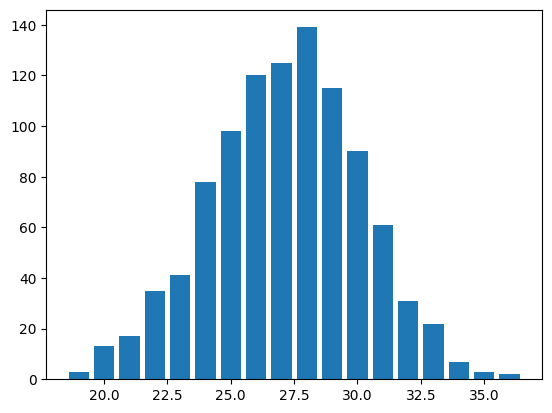

In [159]:
frequency_distr = ages_p2["observation"].value_counts().sort_index()

plt.bar(frequency_distr.index, frequency_distr.values)
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [162]:
# The observation sample appears to be narrower in this population than the one on step 1

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [163]:
# your code here

print("The mean is: ", ages_p2.mean())
print("The standard deviation is: ",ages_p2.std())

The mean is:  observation    27.155
dtype: float64
The standard deviation is:  observation    2.969814
dtype: float64


In [164]:
# This smaller observation sample means a decrease in standard deviation 

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [165]:
# your code here

ages_p3 = pd.read_csv("/Users/pedroblanc/Ironhack/Course/WeekFour/Labs/Descriptive-Stats/data/ages_population3.csv")
ages_p3.head()

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


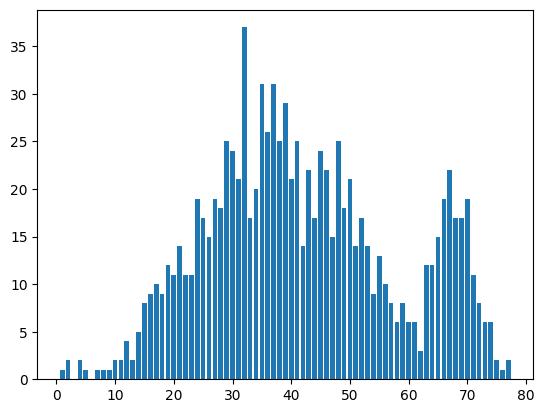

In [166]:
frequency_distr = ages_p3["observation"].value_counts().sort_index()

plt.bar(frequency_distr.index, frequency_distr.values)
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [168]:
# your code here

print("The mean is: ", ages_p3.mean())
print("The standard deviation is: ",ages_p3.std())

The mean is:  observation    41.989
dtype: float64
The standard deviation is:  observation    16.144706
dtype: float64


In [169]:
# The graph proves the existence of a bimodal distribution due to the both peaks present. The first, and wider one, around yound adults and the second, smaller one, around the high 60's

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [173]:
# your code here

q1 = np.quantile(ages_p3, 0.25)
print({q1})

q2 = np.quantile(ages_p3, 0.50)
print({q2})

q3 = np.quantile(ages_p3, 0.75)
print({q3})

q4 = np.quantile(ages_p3, 1)
print({q4})

{30.0}
{40.0}
{53.0}
{77.0}


In [133]:
"""
your comments here
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [174]:
# your code here

q90 = np.percentile(ages_p3, 90)
print({q90})


{67.0}


In [135]:
# 90% of the population falls bellow 67 years

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [136]:
# your code here

In [137]:
"""
your comments here
"""

'\nyour comments here\n'